<a href="https://colab.research.google.com/github/DipeshYogi/Keras_shoe_classifier/blob/master/keras_shoe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout

In [4]:
#The data set for this image classification was obtained by scraping image files from flipkart website.

df = np.load('drive/My Drive/CNN/sneaks/data.npy',allow_pickle=True)

In [5]:
df = pd.DataFrame(df)
df.rename(columns={0:'Img',1:'Label'}, inplace='True')
#shuffle DF
df = df.sample(frac=1).reset_index(drop=True)

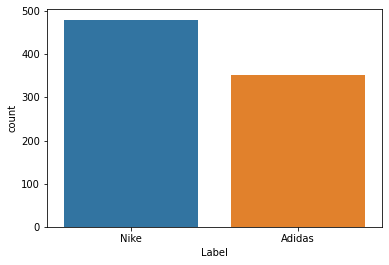

In [6]:
#Dataset is balanced with nearly equal instances of each label
sns.countplot(x='Label', data=df)

In [7]:
#Label targets 
def label_img(img):
    if img == 'Nike':
        return [1,0]
    else:
        return [0,1]
      
df['Label'] = df['Label'].map(label_img)

###################################################################

CNN Model using KERAS with three Convolution layers


In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=5, activation='relu', input_shape=(120,120,1)))
model.add(MaxPool2D(pool_size=(2,2), strides=1, padding='same'))

model.add(Conv2D(64, kernel_size=5,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=1, padding='same'))

model.add(Conv2D(128, kernel_size=5,activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [ ]:
############################################################################################

In [9]:
#Optimizer used is Stochastic Gradient Descent
from keras.optimizers import SGD
opt = SGD(lr=1e-3)

In [10]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#############################################################################################

In [11]:
def get_data(df=df):
  #df = df.sample(frac=1).reset_index(drop=True)
  train = list(df.values)
  ##Train_data
  x = np.array([i[0] for i in train]).reshape(-1,120,120,1)
  y = np.array([i[1] for i in train])
  y = y.astype('float32')
  x = x.astype('float32')
  return x,y

x,y = get_data()

In [12]:
x = x/255

In [13]:
#Splitting training and test data

xtrain = x[:600]
ytrain = y[:600]

xtest = x[600:]
ytest = y[600:]

#########################################################

Training model


In [16]:
model.fit(xtrain, ytrain, batch_size=60, validation_data=(xtest, ytest), epochs=1500,verbose=2)

Train on 600 samples, validate on 232 samples
Epoch 1/1500
 - 13s - loss: 0.6888 - accuracy: 0.5750 - val_loss: 0.6859 - val_accuracy: 0.5431
Epoch 2/1500
 - 2s - loss: 0.6734 - accuracy: 0.5883 - val_loss: 0.6963 - val_accuracy: 0.5431
Epoch 3/1500
 - 2s - loss: 0.6718 - accuracy: 0.5950 - val_loss: 0.6919 - val_accuracy: 0.5431
Epoch 4/1500
 - 2s - loss: 0.6773 - accuracy: 0.5850 - val_loss: 0.6812 - val_accuracy: 0.5431
Epoch 5/1500
 - 2s - loss: 0.6748 - accuracy: 0.5917 - val_loss: 0.6765 - val_accuracy: 0.5431
Epoch 6/1500
 - 2s - loss: 0.6599 - accuracy: 0.5950 - val_loss: 0.6910 - val_accuracy: 0.5431
Epoch 7/1500
 - 2s - loss: 0.6525 - accuracy: 0.6100 - val_loss: 0.6799 - val_accuracy: 0.5259
Epoch 8/1500
 - 2s - loss: 0.6568 - accuracy: 0.5933 - val_loss: 0.6685 - val_accuracy: 0.6509
Epoch 9/1500
 - 2s - loss: 0.6522 - accuracy: 0.6183 - val_loss: 0.7138 - val_accuracy: 0.5431
Epoch 10/1500
 - 2s - loss: 0.6492 - accuracy: 0.6233 - val_loss: 0.6707 - val_accuracy: 0.5517
Ep

In [17]:
############################################################################################
# Evalutation

In [18]:
scores = model.evaluate(xtrain, ytrain)
scores_t = model.evaluate(xtest, ytest)

232/232 [==============================] - 0s 2ms/step


In [19]:
#Model Results

print ('Train Accuracy: {}%'.format(scores[1]*100))
print ('Test Accuracy: {}%'.format(scores_t[1]*100))

Train Accuracy: 100.0%
Test Accuracy: 83.18965435028076%


######################################################

Random Testing on Test Data on which the model was not trained.

In [69]:
i = 666

In [70]:
test_label = y[i:i+4]

In [71]:
test_label = test_label.astype(int)
test_label[0] == [1,0]

array([ True,  True])

In [72]:
y_pred = model.predict(x[i:i+4])

In [73]:
op =[]
for j in y_pred:
  if j[0] < j[1]:
    op.append([0,1])
  else:
    op.append([1,0])
op     

[[1, 0], [0, 1], [1, 0], [1, 0]]

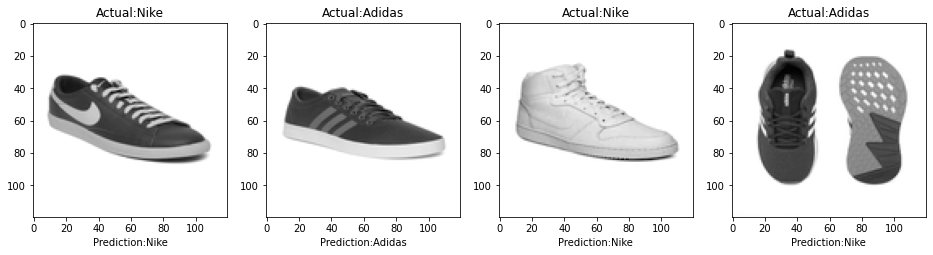

In [74]:
plt.figure(figsize=(16,14))

plt.subplot(1,4,1)
plt.imshow(x[i].reshape(120,120), cmap='gray')
if op[0] == [1,0]:
  plt.xlabel('Prediction:Nike')
else:
  plt.xlabel('Prediction:Adidas')
if test_label[0][0] == 1 and test_label[0][1] == 0:
  plt.title('Actual:Nike')
else:
  plt.title('Actual:Adidas')
  

plt.subplot(1,4,2)           
plt.imshow(x[i+1].reshape(120,120), cmap='gray')            
if op[1] == [1,0]:
  plt.xlabel('Prediction:Nike')
else:
  plt.xlabel('Prediction:Adidas')
if test_label[1][0] == 1 and test_label[1][1] == 0:
  plt.title('Actual:Nike')
else:
  plt.title('Actual:Adidas')            
                      
plt.subplot(1,4,3)      
plt.imshow(x[i+2].reshape(120,120), cmap='gray')          
if op[2] == [1,0]:
  plt.xlabel('Prediction:Nike')
else:
  plt.xlabel('Prediction:Adidas')
if test_label[2][0] == 1 and test_label[2][1] == 0:
  plt.title('Actual:Nike')
else:
  plt.title('Actual:Adidas')
    
plt.subplot(1,4,4)
plt.imshow(x[i+3].reshape(120,120), cmap='gray')
if op[3] == [1,0]:
  plt.xlabel('Prediction:Nike')
else:
  plt.xlabel('Prediction:Adidas')
if test_label[3][0] == 1 and test_label[3][1] == 0:
  plt.title('Actual:Nike')
else:
  plt.title('Actual:Adidas')
            


In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

##################################################################

CONCLUSION:

After various optimization the maximum accuracy score on test data was 82.75%.
However the validation loss tends to increase along with the accuracy while training and evaluating.
This means the model is predicting the correct label but it is less sure of the predictions it is making.

Since for the output layer we are using softmax activation the model predicts the probability for all labels.
1. Suppose we have an input whose label is [1, 0]
   If our model predicts [0.9, 0.1], it has correctly predicted the label with loss ~0.3

2. Suppose we have an input whose label is [1, 0]
   If our model predicts [0.6, 0.4], it still correctly predicted the label but with greater loss ~0.6


It was observed that the model performs very well when predicting the train data again. However the model is not able to perform as well with test data.

After seeing the above results I concluded that the model is able to perform well when test images have logo of their brands on the shoe.
The model gives incorrect predictions in case where the test image has no distinct logo/tags(in case of the fourth image), which would also be difficult for a human to predict by just lookng at the shape and colour of the shoe.


